#basic data

Epoch 1/10
10/10 - 1s - loss: 2.0329 - acc: 0.3000 - val_loss: 1.4253 - val_acc: 0.6000 - 886ms/epoch - 89ms/step
Epoch 2/10
10/10 - 0s - loss: 1.1530 - acc: 0.6521 - val_loss: 0.7703 - val_acc: 0.7500 - 72ms/epoch - 7ms/step
Epoch 3/10
10/10 - 0s - loss: 0.8114 - acc: 0.7333 - val_loss: 0.5359 - val_acc: 0.8500 - 91ms/epoch - 9ms/step
Epoch 4/10
10/10 - 0s - loss: 0.5855 - acc: 0.8042 - val_loss: 0.5097 - val_acc: 0.8583 - 85ms/epoch - 8ms/step
Epoch 5/10
10/10 - 0s - loss: 0.4467 - acc: 0.8625 - val_loss: 0.3972 - val_acc: 0.8667 - 82ms/epoch - 8ms/step
Epoch 6/10
10/10 - 0s - loss: 0.3966 - acc: 0.8687 - val_loss: 0.3538 - val_acc: 0.8750 - 70ms/epoch - 7ms/step
Epoch 7/10
10/10 - 0s - loss: 0.2832 - acc: 0.9146 - val_loss: 0.3307 - val_acc: 0.8750 - 73ms/epoch - 7ms/step
Epoch 8/10
10/10 - 0s - loss: 0.2602 - acc: 0.9167 - val_loss: 0.3302 - val_acc: 0.8917 - 71ms/epoch - 7ms/step
Epoch 9/10
10/10 - 0s - loss: 0.1851 - acc: 0.9375 - val_loss: 0.3833 - val_acc: 0.8750 - 73ms/epoch -

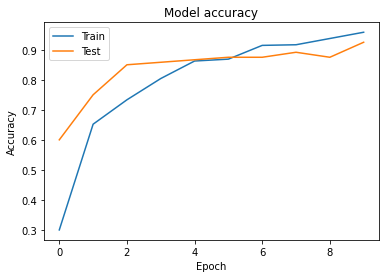

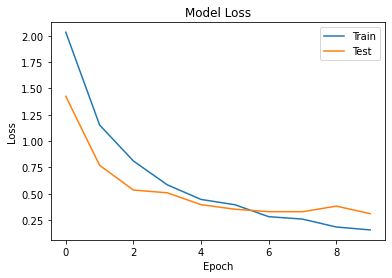

(600, 28, 28, 1)


In [9]:
import numpy as np
import keras
from keras import layers, models, datasets, backend
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras.preprocessing.image import ImageDataGenerator
 
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
 
        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu',
                               input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))
 
        self.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer='rmsprop', metrics=['acc'])
 
class DataML():
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
        _, x_train, _, y_train = model_selection.train_test_split(x_train,
                                                                 y_train,
                                                                 test_size=0.01)
 
        y_train = np_utils.to_categorical(y_train)
        y_test = np_utils.to_categorical(y_test)
 
        img_rows, img_cols = x_train.shape[1:]
 
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
 
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255.0
        x_test /= 255.0
 
        self.input_shape = input_shape
        self.num_classes = 10
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
        self.generator = ImageDataGenerator(rotation_range=20,
                                           width_shift_range=0.05,
                                           height_shift_range=0.05)

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
 
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def main():
    batch_size = 50
    epochs = 10
 
    data = DataML()
    model = CNN(data.input_shape, data.num_classes)
    
    history = model.fit(data.x_train, data.y_train, batch_size = batch_size, validation_split = 0.2, epochs = epochs, verbose = 2)
 
    performance_test = model.evaluate(data.x_test, data.y_test, batch_size=100,
        verbose=0)
    print('\nTest Result ->', performance_test)
 
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    print(data.x_train.shape)
 
main()


#human generated data

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


12/12 - 2s - loss: 1.7433 - acc: 0.4450 - val_loss: 0.8362 - val_acc: 0.7915 - 2s/epoch - 138ms/step
Epoch 2/10
12/12 - 1s - loss: 0.8770 - acc: 0.7117 - val_loss: 0.5236 - val_acc: 0.8411 - 1s/epoch - 113ms/step
Epoch 3/10
12/12 - 1s - loss: 0.5180 - acc: 0.8417 - val_loss: 0.3889 - val_acc: 0.8860 - 988ms/epoch - 82ms/step
Epoch 4/10
12/12 - 1s - loss: 0.3958 - acc: 0.8833 - val_loss: 0.3282 - val_acc: 0.9068 - 1s/epoch - 113ms/step
Epoch 5/10
12/12 - 1s - loss: 0.3098 - acc: 0.9117 - val_loss: 0.3108 - val_acc: 0.9028 - 870ms/epoch - 72ms/step
Epoch 6/10
12/12 - 1s - loss: 0.2457 - acc: 0.9250 - val_loss: 0.3228 - val_acc: 0.8933 - 883ms/epoch - 74ms/step
Epoch 7/10
12/12 - 1s - loss: 0.1959 - acc: 0.9350 - val_loss: 0.2758 - val_acc: 0.9156 - 1s/epoch - 113ms/step
Epoch 8/10
12/12 - 1s - loss: 0.1366 - acc: 0.9600 - val_loss: 0.2652 - val_acc: 0.9228 - 1s/epoch - 114ms/step
Epoch 9/10
12/12 - 1s - loss: 0.1300 - acc: 0.9550 - val_loss: 0.2415 - val_acc: 0.9288 - 1s/epoch - 114ms/st

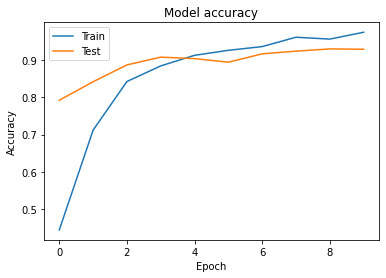

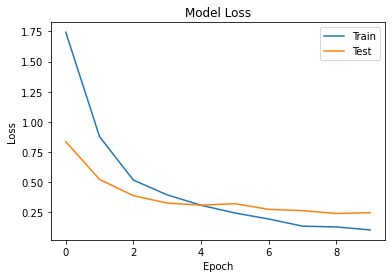

In [8]:
class DataML():
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
        _, x_train, _, y_train = model_selection.train_test_split(x_train,
                                                                 y_train,
                                                                 test_size=0.01)
 
        y_train = np_utils.to_categorical(y_train)
        y_test = np_utils.to_categorical(y_test)
 
        img_rows, img_cols = x_train.shape[1:]
 
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
 
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255.0
        x_test /= 255.0
 
        self.input_shape = input_shape
        self.num_classes = 10
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
        self.generator = ImageDataGenerator()

def main():
    batch_size = 50
    epochs = 10
 
    data = DataML()
    model = CNN(data.input_shape, data.num_classes)
    
    data_flow = data.generator.flow(data.x_train, data.y_train,
                                    batch_size=batch_size)
 
    history = model.fit_generator(data_flow, epochs=epochs, 
                                  verbose=2, validation_data=(data.x_test, data.y_test))
 

    performance_test = model.evaluate(data.x_test, data.y_test, batch_size=100,
        verbose=0)
    print('\nTest Result ->', performance_test)
 
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    print(data_flow)


main()

#GA applied data

#데이터생성

In [86]:
import numpy as np
import pandas as pd
import random

gene = 8
pop = 10

def make_list():
  first_List = []
  for i in range(1):
    first_List.append(random.randrange(0,180)) #rotation_range
    first_List.append(round(random.random(),2)) #width_shift_range
    first_List.append(round(random.random(),2)) #height_shift_range
    first_List.append(round(random.random()*2,2)) #shear_range
    first_List.append([round(random.random(),2), round(random.random()+1,2)]) #zoom_range ( = [zoom_range_min, zoom_range_max] )
    first_List.append(random.choice([True, False])) #horizontal_flip
    first_List.append(random.choice([True, False])) #vertical_flip
  return first_List

last_List = []
for i in range(pop):
  first_List = make_list()
  last_List.append(first_List)
df = pd.DataFrame(last_List)
df

,0,1,2,3,4,5,6
0,173,0.82,0.37,0.91,"[0.9, 1.12]",False,False
1,118,0.89,0.06,1.31,"[0.23, 1.57]",True,False
2,113,0.06,0.41,0.25,"[0.07, 1.2]",False,False
3,88,0.33,0.61,1.90,"[0.65, 1.64]",False,True
4,115,0.83,0.51,1.30,"[0.3, 1.47]",False,True
5,127,0.90,0.35,1.28,"[0.29, 1.3]",True,False
6,84,0.12,0.03,0.80,"[0.32, 1.07]",False,True
7,96,0.48,0.83,1.64,"[0.93, 1.52]",False,True
8,117,0.57,0.91,1.38,"[0.26, 1.95]",True,False
9,176,0.13,0.72,1.01,"[0.13, 1.23]",True,False


In [109]:
def generate(result_list):
  new_df = pd.DataFrame()
  for i in range(10):
#높은 accuracy가 선정될 확률 0.8    
    k = 0.8
    selected_list = random.sample(result_list,8)
    first_parent_list = selected_list[:4]
    second_parent_list = selected_list[4:]
    parent_list = [first_parent_list, second_parent_list]
    pplist = []
    for plist in parent_list:
      if random.random() < k:
        pplist.append(max(plist))
      else:
        pplist.append(min(plist))

    first_parent_index = result_list.index(pplist[0])
    second_parent_index = result_list.index(pplist[1])

    a = df.loc[first_parent_index]
    b = df.loc[second_parent_index]

    switch_point = random.randrange(0,10)

#mutaion 비율 0.1로 지정
    if random.random() > 0.1:
      next_generate = pd.concat([a[:switch_point],b[switch_point:]])
      new_df[i] = next_generate
    else :
      mutation_list = make_list()
      new_df[i] = pd.Series(mutation_list)

  return new_df.transpose()

In [ ]:
class DataML():
    def __init__(self,df):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
        _, x_train, _, y_train = model_selection.train_test_split(x_train,
                                                                 y_train,
                                                                 test_size=0.01)
        self.df = df
 
        y_train = np_utils.to_categorical(y_train)
        y_test = np_utils.to_categorical(y_test)
 
        img_rows, img_cols = x_train.shape[1:]
 
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
 
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255.0
        x_test /= 255.0
 
        self.input_shape = input_shape
        self.num_classes = 10
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
        self.generator = ImageDataGenerator(rotation_range = self.df[0], width_shift_range = self.df[1], height_shift_range = self.df[2],
                                            shear_range = self.df[3], zoom_range = self.df[4], horizontal_flip = self.df[5],
                                            vertical_flip = self.df[6])

def main(i):
    batch_size = 50
    epochs = 10
 
    data = DataML(df.loc[i])
    model = CNN(data.input_shape, data.num_classes)
    
    data_flow = data.generator.flow(data.x_train, data.y_train,
                                    batch_size=batch_size)
 
    history = model.fit_generator(data_flow, epochs=epochs, 
                                  verbose=0, validation_data=(data.x_test, data.y_test))
 

    performance_test = model.evaluate(data.x_test, data.y_test, batch_size=100,
        verbose=0)
    #print('\nTest Result ->', performance_test)
    result = round(performance_test[1],2)
    '''
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    '''
    return result

for i in range(30):
  result_list = []
  for j in range(10):
    result_list.append(main(j))
  print(f'Best Accuracy of {i}th generation : {max(result_list) * 100}%' )
  df = generate(result_list)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
